In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [2]:
df = pd.read_csv('/content/drive/MyDrive/data_mining/project/Preprocessed_data.csv')

numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler_standard = StandardScaler()
df[numerical_columns] = scaler_standard.fit_transform(df[numerical_columns])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3,1.645784,0,1,0,10.773586,1.113015,0.067007,0
1,0,1.509319,1,1,3,-0.586156,-0.679867,0.442865,0
2,1,-1.174491,0,0,0,0.129663,1.113015,-1.311139,0
3,1,0.190158,0,0,0,-1.551434,1.013410,1.570439,1
4,1,1.827737,0,0,5,-0.237403,0.216574,-1.311139,0


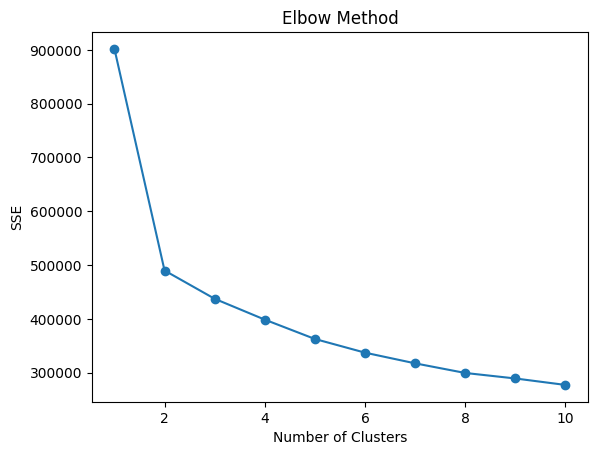

In [5]:

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

In [7]:
df.groupby('KMeans_Cluster').mean()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
KMeans_Cluster,,,,,,,,,
0,0.550357,-0.203034,0.048188,0.032255,4.544272,-0.159572,-0.027137,-0.036405,0.049627
1,0.622095,0.197370,0.096045,0.043406,0.491537,0.155121,0.026380,0.035390,0.095346


In [ ]:

hierarchical = AgglomerativeClustering(n_clusters=2, linkage='average')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df)


استاد از کتابخانه ی scipy

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(df, method='ward')

df['Hierarchical_Cluster'] = fcluster(Z, t=2, criterion='maxclust')


In [ ]:
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
df.groupby('Hierarchical_Cluster').mean()

In [8]:
df_sample = df.sample(n=10000, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
df_sample['Hierarchical_Cluster'] = hierarchical.fit_predict(df_sample)


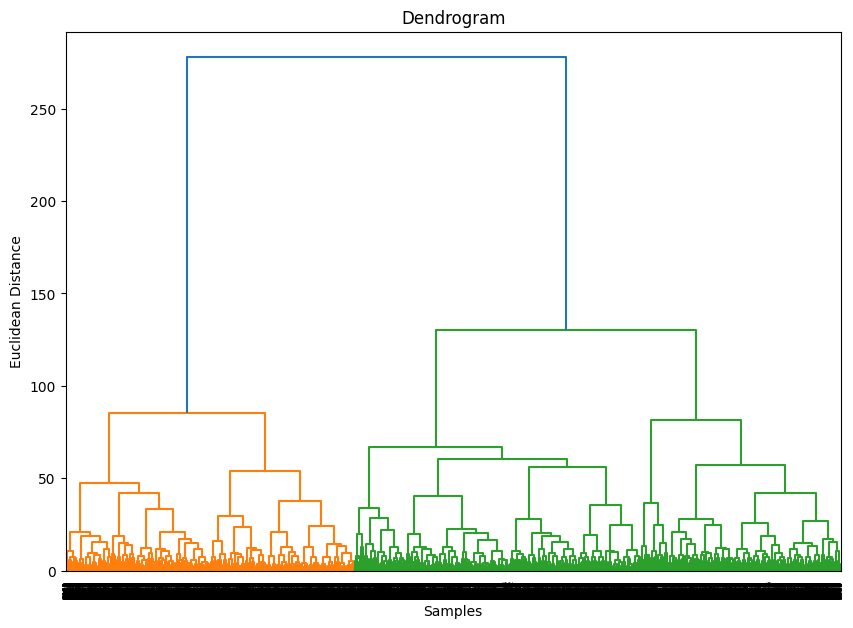

In [9]:
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(df_sample, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

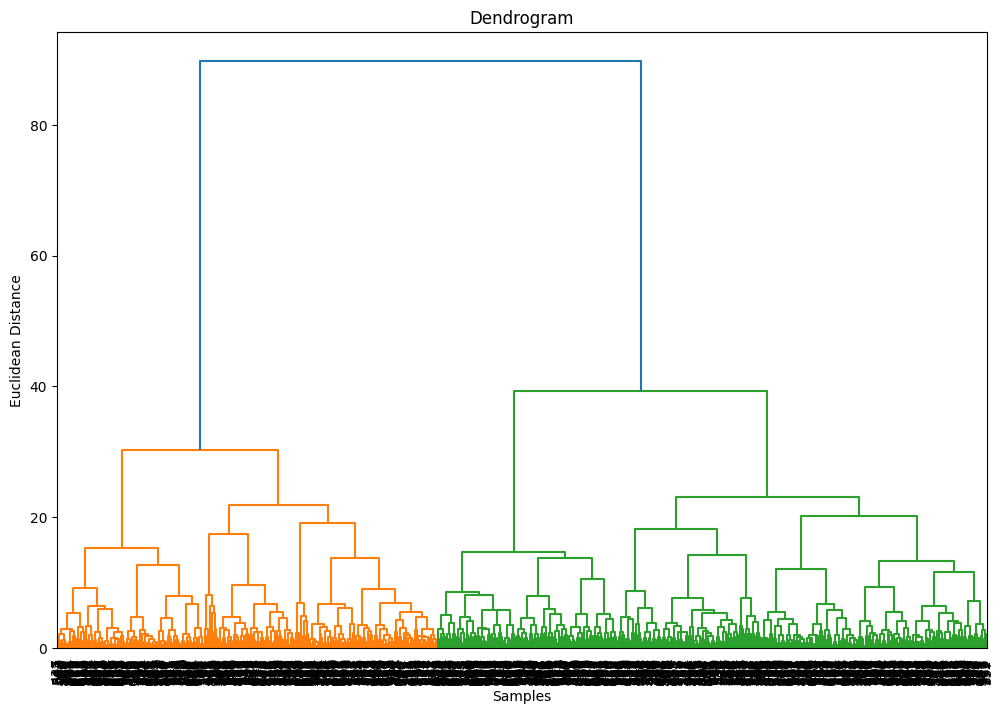

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_sample, method='ward')

plt.figure(figsize=(12, 8))

dendrogram(
    Z,
    leaf_rotation=90,
    leaf_font_size=10
)


plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')

plt.show()


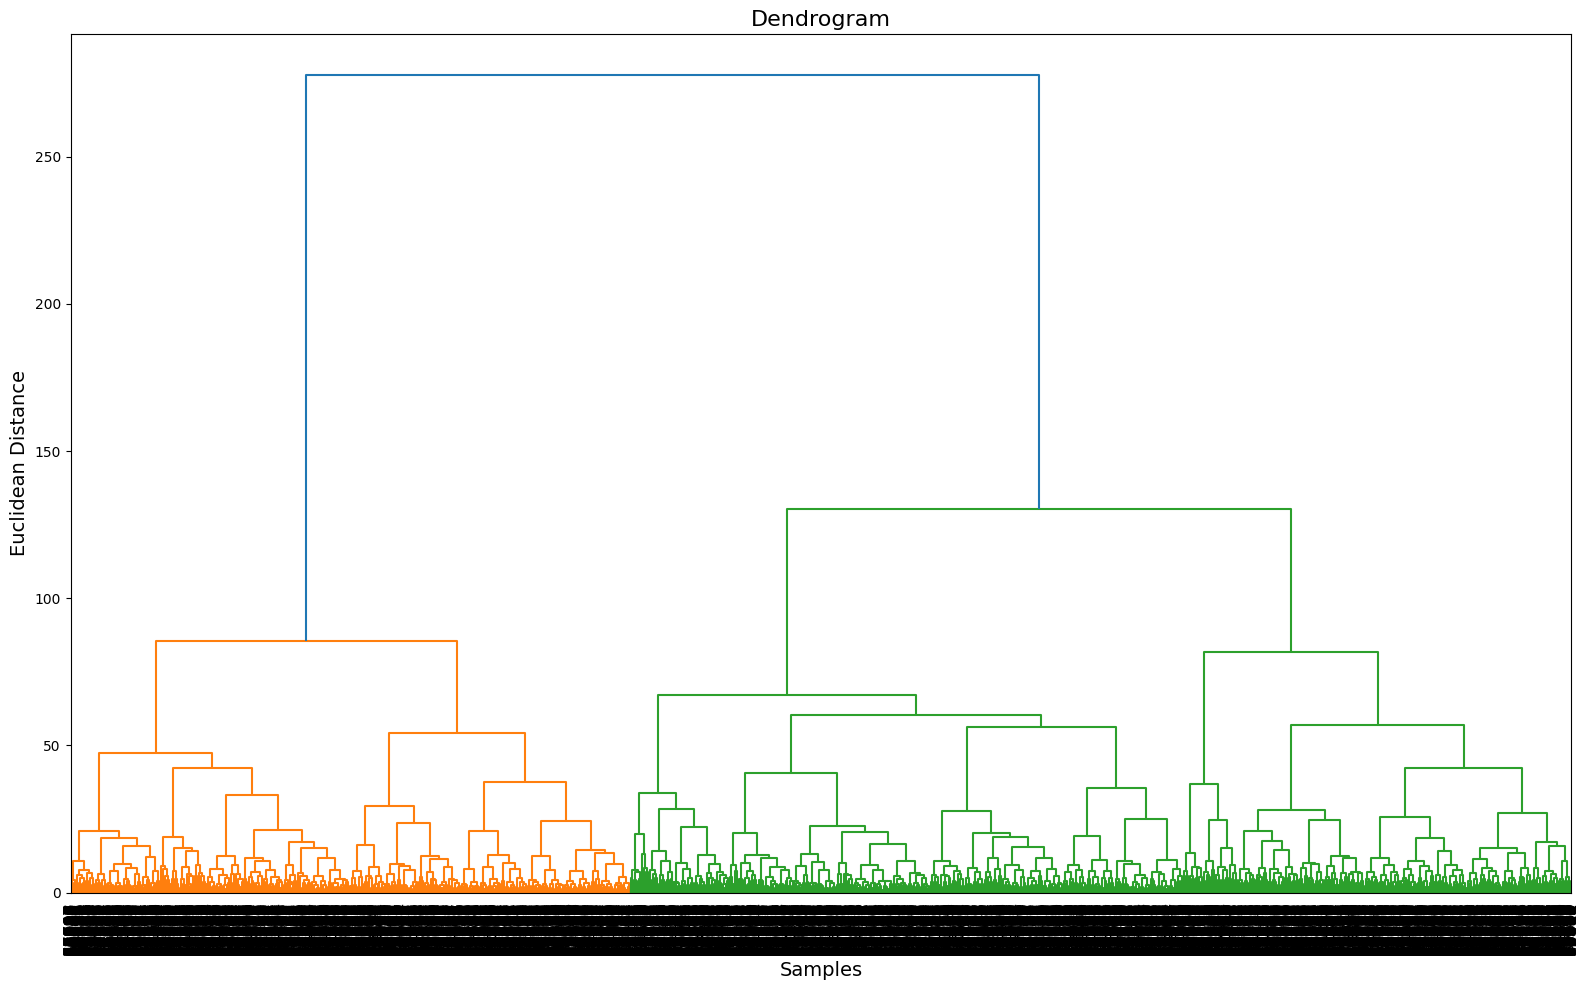

In [12]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_sample, method='ward')

plt.figure(figsize=(16, 10))


dendrogram(
    Z,
    leaf_rotation=90,
    leaf_font_size=12,
    labels=df_sample.index
)


plt.title('Dendrogram', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Euclidean Distance', fontsize=14)


plt.tight_layout()
plt.show()


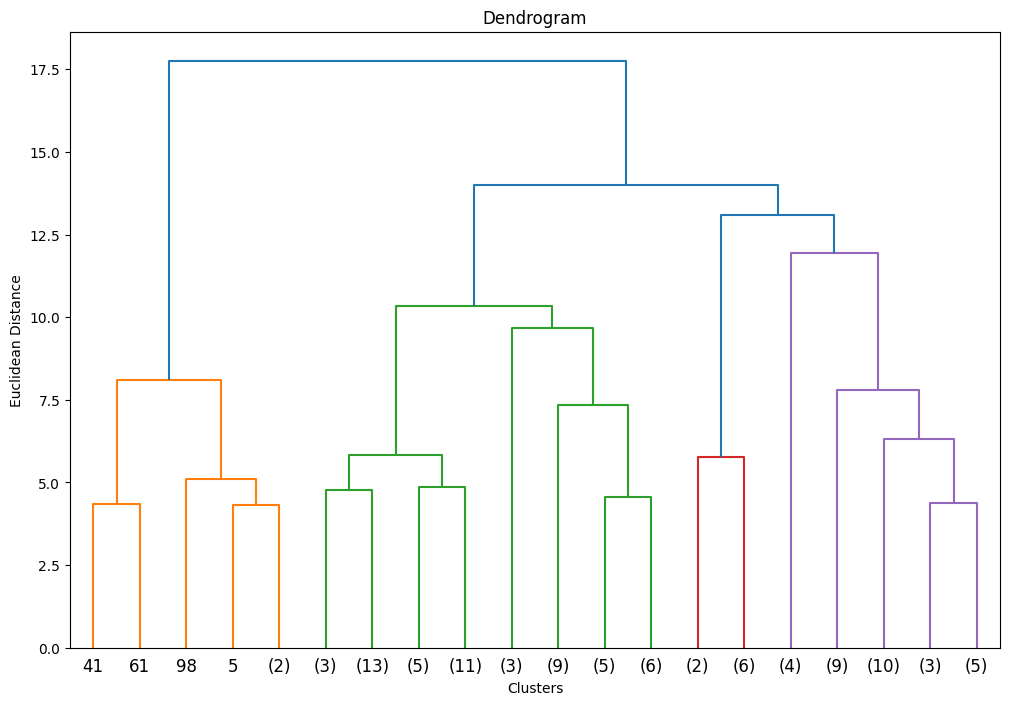

Number of Clusters: 2, Silhouette Score: 0.45038596599868214
Number of Clusters: 3, Silhouette Score: 0.18462190359841035
Number of Clusters: 4, Silhouette Score: 0.2129211188863173
Number of Clusters: 5, Silhouette Score: 0.22416800471418338
Optimal Number of Clusters: 2
Cluster Means:
            gender       age  hypertension  heart_disease  smoking_history  \
Cluster                                                                     
0        0.648936  0.008350      0.085106       0.042553         2.361702   
1        1.000000  1.092343      0.333333       0.333333         2.666667   

              bmi  HbA1c_level  blood_glucose_level  diabetes  
Cluster                                                        
0        0.029307    -0.090717            -0.295523       0.0  
1       -0.237111     1.245821             1.904535       1.0  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


sample_size = 100
if len(df) > sample_size:
    df_sample = df.sample(n=sample_size, random_state=42)
else:
    df_sample = df.copy()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample)


plt.figure(figsize=(12, 8))
linked = linkage(df_scaled, method='ward')
dendrogram(linked, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()


silhouette_scores = {}
for n_clusters in range(2, 6):
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clustering_model.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores[n_clusters] = score
    print(f'Number of Clusters: {n_clusters}, Silhouette Score: {score}')

best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f'Optimal Number of Clusters: {best_n_clusters}')

final_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
df_sample['Cluster'] = final_clustering.fit_predict(df_scaled)

cluster_means = df_sample.groupby('Cluster').mean()
print("Cluster Means:\n", cluster_means)

plt.figure(figsize=(16, 10))
linked_full = linkage(scaler.fit_transform(df), method='ward')
dendrogram(linked_full, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title('Dendrogram (Full Data)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

sns.clustermap(df_scaled, method='ward', metric='euclidean', cmap='viridis', figsize=(16, 10))

plt.title('Dendrogram', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Euclidean Distance', fontsize=14)

plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
